#6SP : Machine Learning Model of Time Series of the Number of Accidents
#Road Accident Analyser
#Group 16
#E/17/219 : Ishara Nawarathna
#E/17/027 : Pubudu Bandara
#E/17/212 : Dananjaya Morais

This is a time series model which will indicate how the number of accidents varies with the data. We have already done the data preprocessing task for the dataset and in this notebook , we have implemented the time series model as a LSTM recurrent neural network model.

##Preconfigurations

In [142]:
#import impoartant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
#loading the path of the dataset which already build
dataset_path = "/content/drive/MyDrive/6SP_Machine_Learning_Model/time_series_dataset.csv"

In [144]:
#loading the dataset into a csv file
df = pd.read_csv(dataset_path,index_col="Time",parse_dates=True)
df.head(10)

,NumberOfAccidents
Time,
2017-01-01,24
2017-01-02,190
2017-01-03,703
2017-01-04,369
2017-01-05,811
2017-01-06,790
2017-01-07,200
2017-01-08,134
2017-01-09,767


##Analysis of data

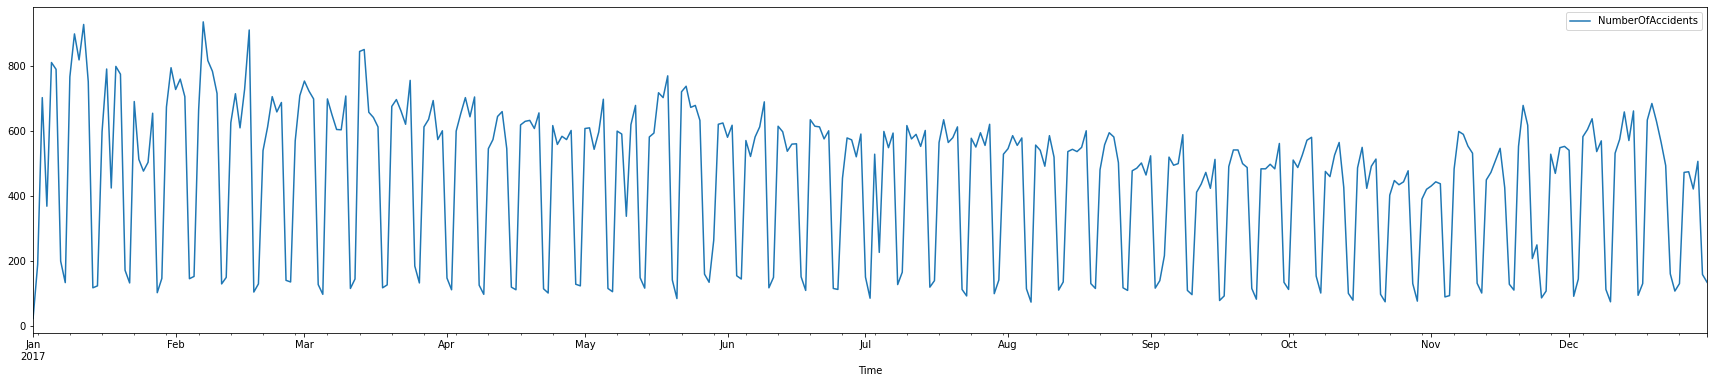

In [145]:
df.plot(figsize=(30,6))

lets take a look at the seasonal nature and the trend of the data

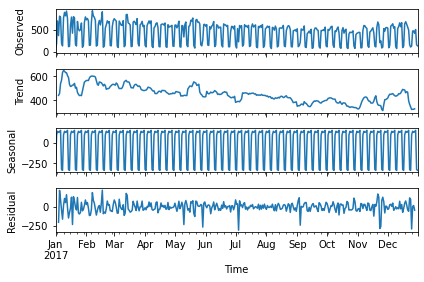

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df['NumberOfAccidents'])
components.plot();

Lets take some observations in the observed component of the data.

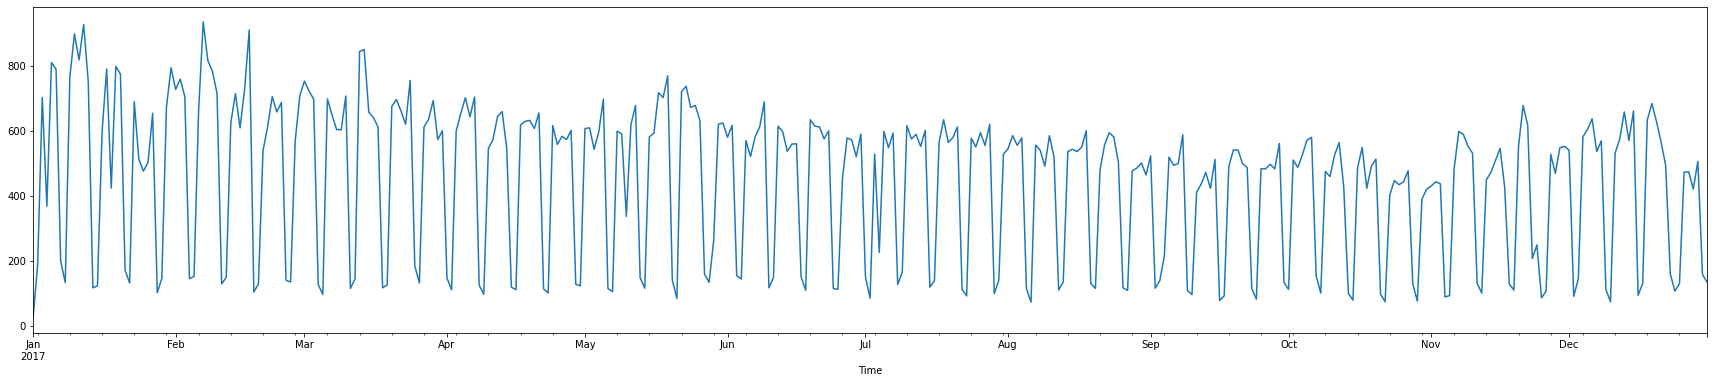

In [147]:
components.observed.plot(figsize=(30,6))

Some pattern can be seen in the data. Now lets see the trend of the data.

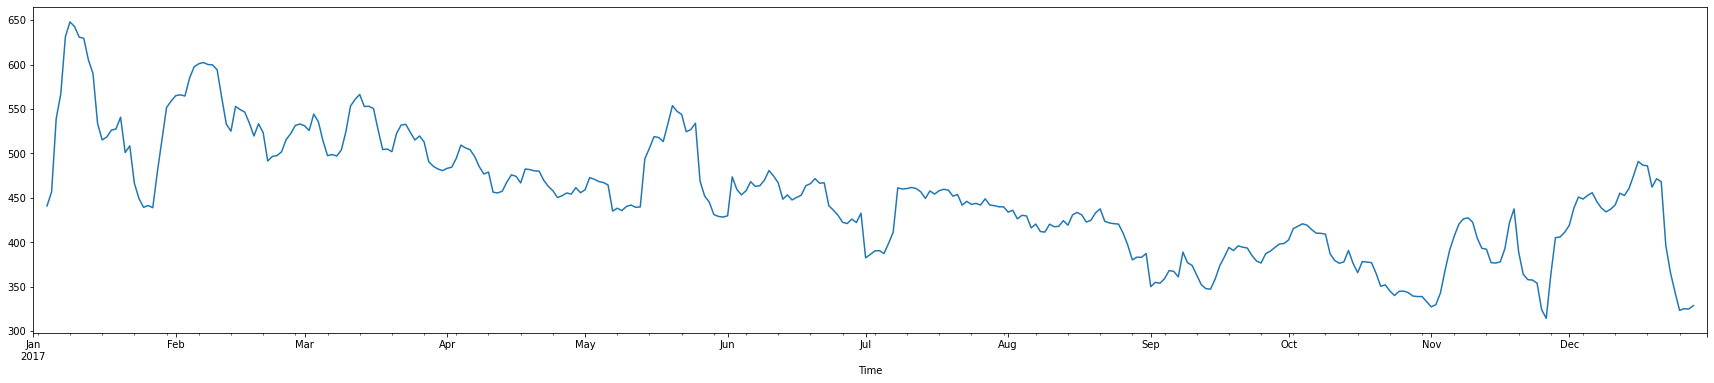

In [148]:
components.trend.plot(figsize=(30,6))

The number of accidents tends to reduce overall from the begining of the year to the end of the year.

Now lets move onto the seasonal component which show the patterns after removing the trend.

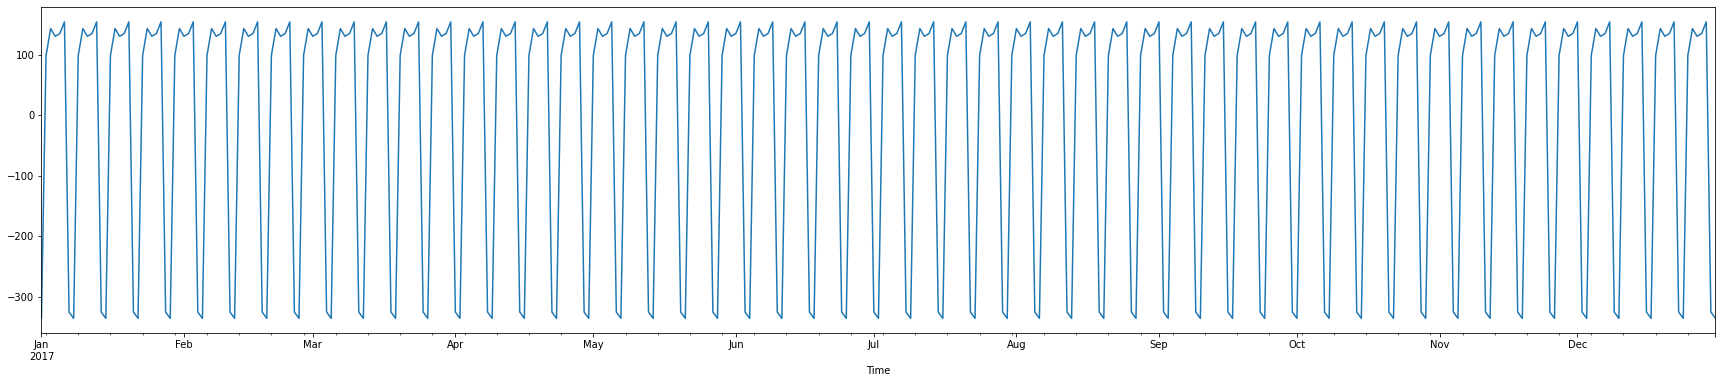

In [149]:
components.seasonal.plot(figsize=(30,6))

It can be clearly seen a trend after the trend is removed from the observed data.

Lets see how the noise/residue is varying with the data.

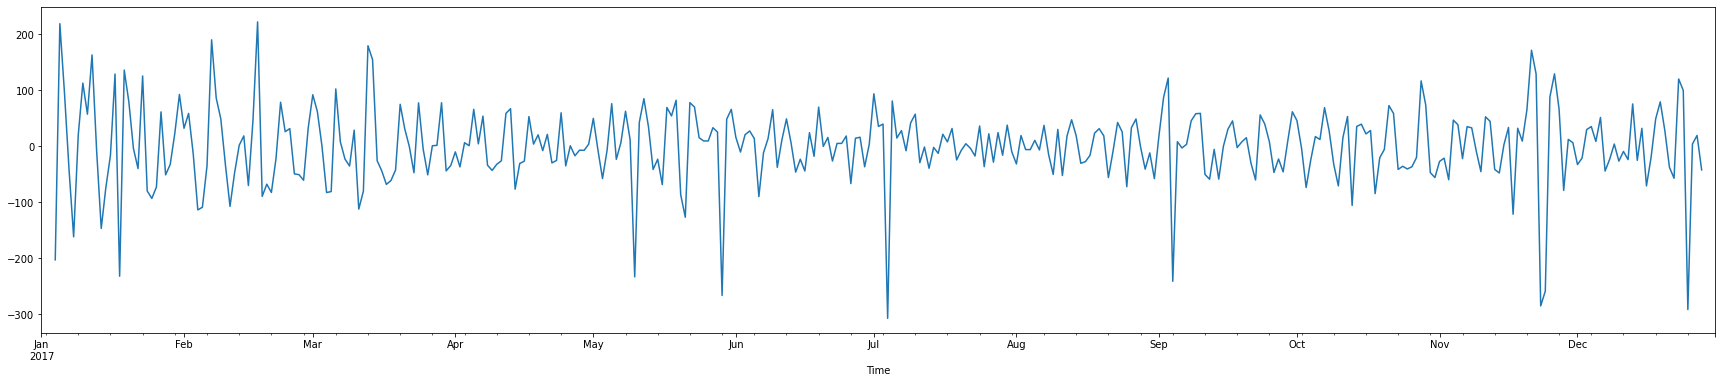

In [150]:
components.resid.plot(figsize=(30,6))

This residaul component is the component which can not be explained by the model. Therefore it is called as the noise of the dataset.

##Data Splitting for the model

In [151]:
#checking the number of rows in the dataset
len(df)

365

In [152]:
#split ratio : 80% to 20%
#getting the margin for the split
len(df)/10*8

292.0

In [153]:
#splitting data
train = df.iloc[:292]
test = df.iloc[292:]

In [154]:
#checking the train dataset
train.head()

,NumberOfAccidents
Time,
2017-01-01,24
2017-01-02,190
2017-01-03,703
2017-01-04,369
2017-01-05,811


In [155]:
#checking the test dataset
test.head()

,NumberOfAccidents
Time,
2017-10-20,514
2017-10-21,98
2017-10-22,75
2017-10-23,403
2017-10-24,448


##Feature Engineering : Normalizing data

lets take the max and min values of number of accidents

In [156]:
df["NumberOfAccidents"].min()

24

In [157]:
df["NumberOfAccidents"].max()

936

We can see a high range of the dataset. Therefore the machine learning model will get confused when it see a large number of values. Therefore it is always a good step to normalize the dataset.

In [158]:
#getting the min max scaler object to normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
#transforming the datasets into normalized form
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [160]:
#lets take a look at the test and train set after normalizing
scaled_train[:10]

array([[0.        ],
       [0.18201754],
       [0.74451754],
       [0.37828947],
       [0.8629386 ],
       [0.83991228],
       [0.19298246],
       [0.12061404],
       [0.81469298],
       [0.95942982]])

In [161]:
scaled_test[:10]

array([[0.5372807 ],
       [0.08114035],
       [0.05592105],
       [0.41557018],
       [0.46491228],
       [0.45065789],
       [0.46052632],
       [0.49780702],
       [0.11732456],
       [0.05811404]])

##Creating the generator for the model

In [162]:
#importing the libary for creating the generator
from keras.preprocessing.sequence import TimeseriesGenerator

In [163]:
#parameter definition for the generator
input_size = 3
feature_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=input_size,batch_size=1)

In [164]:
#checking the generator 
X,y = generator[0]
print(f"Array of values : {X.flatten()}")
print(f"Predict this value : {y}")

Array of values : [0.         0.18201754 0.74451754]
Predict this value : [[0.37828947]]


In [165]:
#checking the shape of the array
X.shape

(1, 3, 1)

In [166]:
#instead of 3,lets use 12 as the input size
input_size = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length = input_size,batch_size=1)

##Defining the machine learning model

In [167]:
#importing modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [168]:
#machine learning model architecture

#first create a model with a Sequential object
#here layers are added in sequence manner i.e. one after the other
model = Sequential()

#add LSTM layer to the model
model.add(LSTM(100,activation='relu',input_shape=(input_size,feature_size)))

#adding a dense layer to the model
#this has only one neuron which is the prediction or the output of the model
model.add(Dense(1))

In [169]:
#model compilation
model.compile(optimizer="adam",loss="mse")

In [170]:
#lets take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


##Model Fitting

Here the model will be trained for the given generator which we have already created.

In [171]:
model.fit(generator,epochs=50)

Epoch 1/50
280/280 [==============================] - 3s 7ms/step - loss: 0.0837
Epoch 2/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0695
Epoch 3/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0676
Epoch 4/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0639
Epoch 5/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0612
Epoch 6/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0503
Epoch 7/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0351
Epoch 8/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0267
Epoch 9/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0189
Epoch 10/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0164
Epoch 11/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0152
Epoch 12/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0131
Epoch 13/50
280/280 [====

##Model Evaluation


Text(0.5, 1.0, 'Loss vs Number of Epochs')

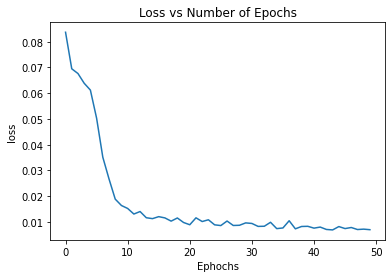

In [172]:
loss_per_epochs = model.history.history['loss']
plt.plot(range(len(loss_per_epochs)),loss_per_epochs)
plt.xlabel("Ephochs")
plt.ylabel("loss")
plt.title("Loss vs Number of Epochs")

It seems that the model is reducing the loss when it goes more than 10 epochs. Therefore it is okay to train the model for only 15 epochs.

##Getting predictions on the model

In [173]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1,input_size,feature_size))
model.predict(last_train_batch),scaled_test[0]

(array([[0.5506989]], dtype=float32), array([0.5372807]))

Predicted value is very close to the actual value. This is a good indication that the model is performing very accurate on the dataset. 

Now lets get predictions for all the values in the dataset.

In [174]:
#to store the values in the test predictions
test_predictions = []

#getting the last 12 values in the traing set
first_eval_batch = scaled_train[-input_size:]

#reshaping the current test input
current_batch = first_eval_batch.reshape((1,input_size,feature_size))

#predict all the values in the testing test
for i in range(len(scaled_test)):

  #getting the last 12 values in order to make a predictions
  current_pred = model.predict(current_batch)[0]

  #append the current prediction to the test predictions list
  test_predictions.append(current_pred)

  #use the prediction to define the new batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [175]:
#lets see the predictions list
test_predictions

[array([0.5506989], dtype=float32),
 array([0.10403251], dtype=float32),
 array([0.08748907], dtype=float32),
 array([0.41130334], dtype=float32),
 array([0.4605571], dtype=float32),
 array([0.46660405], dtype=float32),
 array([0.47236985], dtype=float32),
 array([0.5125504], dtype=float32),
 array([0.10251392], dtype=float32),
 array([0.09413505], dtype=float32),
 array([0.4012102], dtype=float32),
 array([0.45065272], dtype=float32),
 array([0.4590516], dtype=float32),
 array([0.46807724], dtype=float32),
 array([0.5046427], dtype=float32),
 array([0.10312879], dtype=float32),
 array([0.09579954], dtype=float32),
 array([0.39845335], dtype=float32),
 array([0.44823992], dtype=float32),
 array([0.4572925], dtype=float32),
 array([0.46637088], dtype=float32),
 array([0.5034226], dtype=float32),
 array([0.10342991], dtype=float32),
 array([0.09636194], dtype=float32),
 array([0.39790827], dtype=float32),
 array([0.44783503], dtype=float32),
 array([0.4571063], dtype=float32),
 array([0.

We can see that, the values are still in the normalized form. We need to convert this into the number of accidents so that the values are much more obvious.

In [176]:
#getting the actual predicted values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions[:10]

array([[526.23737526],
       [118.87764823],
       [103.79003048],
       [399.10864735],
       [444.02807808],
       [449.54289722],
       [454.80130291],
       [491.44597721],
       [117.49269211],
       [109.85116196]])

Now that the predictions are done, we can create a new column in the test dataframe so that we can easily compare them.

In [177]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lets visualize the actual values against the predicted values in the test dataset.

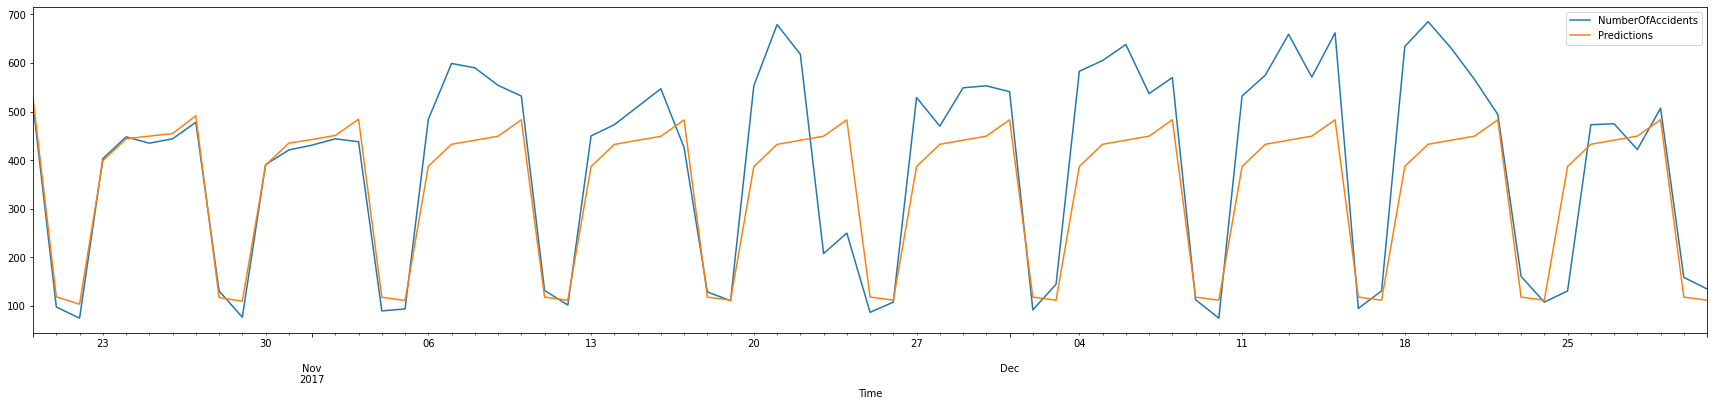

In [178]:
test.plot(figsize=(30,6))

It seems like the model has done a very good job at prediting the values and identifying the patterns in the dataset.

For furthermore evaluation in the machine learning model, we can evaluate the model using root mean squared error.

In [179]:
from sklearn.metrics import mean_squared_error
from math import sqrt

root_mean_squred_error = sqrt(mean_squared_error(test["NumberOfAccidents"],test['Predictions']))
root_mean_squred_error

110.56505743673412